# **PCOS Lifestyle Impact Prediction**

# This Jupyter notebook implements a series of machine learning models to predict the likelihood of PCOS based on lifestyle factors. The models used include Random Forest, Decision Trees, Logistic Regression, and MLP. The dataset is preprocessed, features are engineered, and the models are evaluated for accuracy.

# **Loading and Initial Dataset Checks**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Load the dataset from the CSV file

In [2]:
data = pd.read_csv("input/Cleaned-Data.csv")
print("Initial dataset shape:", data.shape)

Initial dataset shape: (173, 36)


# **Data Preprocessing and Validation**

In [3]:
print(data.describe())

        Weight_kg   Height_ft  Diet_Bread_Cereals  Diet_Milk_Products  \
count  173.000000  173.000000          173.000000          173.000000   
mean    56.549711  160.636647            5.445087            3.647399   
std     12.025369    7.287373            2.116832            2.548930   
min     36.000000  124.460000            0.000000            0.000000   
25%     49.000000  157.480000            4.000000            1.000000   
50%     55.000000  160.020000            7.000000            3.000000   
75%     64.000000  165.100000            7.000000            7.000000   
max    115.000000  182.880000            7.000000            7.000000   

       Diet_Fruits  Diet_Vegetables  Diet_Starchy_Vegetables  \
count   173.000000       173.000000               173.000000   
mean      3.034682         3.439306                 3.069364   
std       2.048527         1.769596                 1.857054   
min       0.000000         0.000000                 0.000000   
25%       1.000000    

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float64
 2   Height_ft                   173 non-null    float64
 3   Marital_Status              173 non-null    object 
 4   PCOS                        173 non-null    object 
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

In [5]:
data.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,...,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,...,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,...,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [6]:
data.isnull().sum()

Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                          0
Family_History_PCOS           0
Menstrual_Irregularity        0
Hormonal_Imbalance            0
Hyperandrogenism              0
Hirsutism                     0
Mental_Health                 0
Conception_Difficulty         0
Insulin_Resistance            0
Diabetes                      0
Childhood_Trauma              0
Cardiovascular_Disease        0
Diet_Bread_Cereals            0
Diet_Milk_Products            0
Diet_Fruits                   0
Diet_Vegetables               0
Diet_Starchy_Vegetables       0
Diet_NonStarchy_Vegetables    0
Diet_Fats                     0
Diet_Sweets                   0
Diet_Fried_Food               0
Diet_Tea_Coffee               0
Diet_Multivitamin             0
Vegetarian                    0
Exercise_Frequency            0
Exercise_Type                 0
Exercise_Duration             0
Sleep_Ho

# **Label Encoding Categorical Features**

# Encode all categorical columns except 'PCOS'

In [7]:
categorical_cols = data.drop(columns=['PCOS']).select_dtypes(include=['object']).columns
data_encoded = data.copy()

# Use separate LabelEncoder for each column to avoid conflicts

In [8]:
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Convert target variable 'PCOS' to numerical (1/0)

In [9]:
data_encoded['PCOS'] = data_encoded['PCOS'].map({'Yes': 1, 'No': 0})

# **Critical: Target Validation**

In [10]:
target_counts = data_encoded['PCOS'].value_counts()
print("\nTarget distribution after encoding:")
print(target_counts)



Target distribution after encoding:
PCOS
0.0    134
1.0     38
Name: count, dtype: int64


# Filter out classes with insufficient samples (if any)

In [11]:
valid_classes = target_counts[target_counts >= 2].index
data_filtered = data_encoded[data_encoded['PCOS'].isin(valid_classes)]
print("\nFiltered dataset shape:", data_filtered.shape)


Filtered dataset shape: (172, 36)


# **Feature Engineering**

# Calculate BMI

In [12]:
data_filtered = data_filtered.copy()
data_filtered.loc[:, 'Height_m'] = data_filtered['Height_ft'] * 0.3048
data_filtered.loc[:, 'BMI'] = data_filtered['Weight_kg'] / (data_filtered['Height_m'] ** 2)

# Calculate Nutritional Score

In [13]:
nutrition_weights = {
    'Diet_Bread_Cereals': 1,
    'Diet_Milk_Products': 1,
    'Diet_Fruits': 2,
    'Diet_Vegetables': 2,
    'Diet_Starchy_Vegetables': -1,
    'Diet_NonStarchy_Vegetables': 2,
    'Diet_Fats': -2,
    'Diet_Sweets': -3,
    'Diet_Fried_Food': -3,
    'Diet_Tea_Coffee': 0,
}
data_filtered.loc[:, 'Nutritional_Score'] = data_filtered[nutrition_weights.keys()].dot(pd.Series(nutrition_weights))

# **Data Splitting**

In [14]:
features = data_filtered.drop(columns=['PCOS'])
target = data_filtered['PCOS']

# Stratified split to maintain class distribution

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, 
    test_size=0.2, 
    random_state=42, 
    stratify=target
)

# **Feature Scaling**

In [16]:
scaler = StandardScaler()
numerical_cols = features.select_dtypes(include=[np.number]).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# **Model Training**

In [17]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Random Forest Accuracy: 0.8857

Decision Tree Accuracy: 0.7429

Logistic Regression Accuracy: 0.7429

MLP Accuracy: 0.7429


# **Best Model Optimization**

In [18]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# **Final Evaluation**

In [19]:
y_pred = best_rf.predict(X_test)
print("\nBest Model Test Accuracy:", accuracy_score(y_test, y_pred))


Best Model Test Accuracy: 0.8857142857142857


# Confusion Matrix

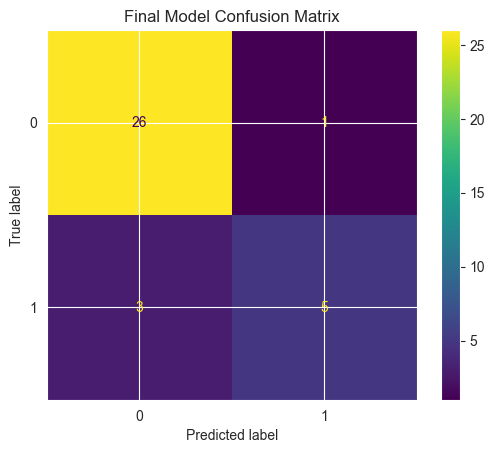

In [20]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Final Model Confusion Matrix')
plt.show()

# Feature Importance

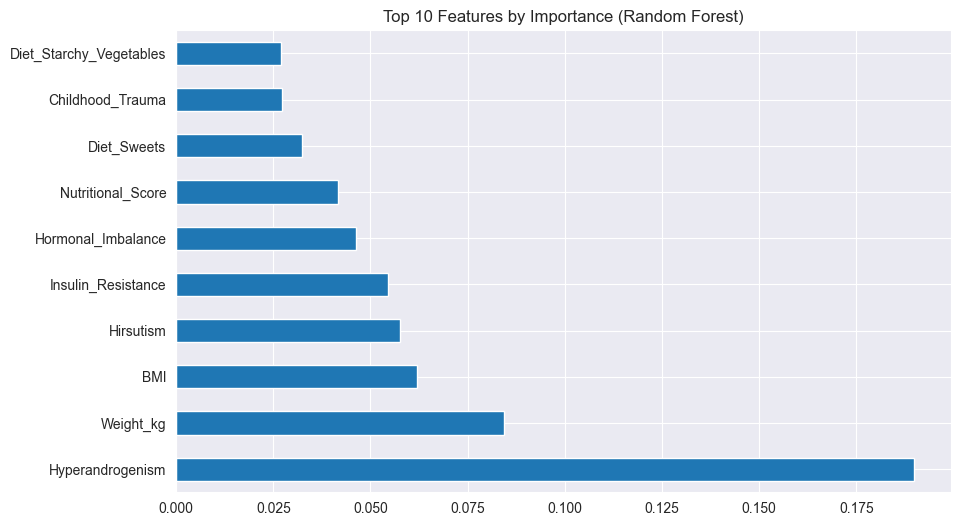

In [21]:
importances = best_rf.feature_importances_
feature_importance_df = pd.Series(importances, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_df.head(10).plot(kind='barh')
plt.title('Top 10 Features by Importance (Random Forest)')
plt.show()

# **Exploratory Data Analysis (EDA)**

# Correlation Heatmap (Now all columns are numerical)

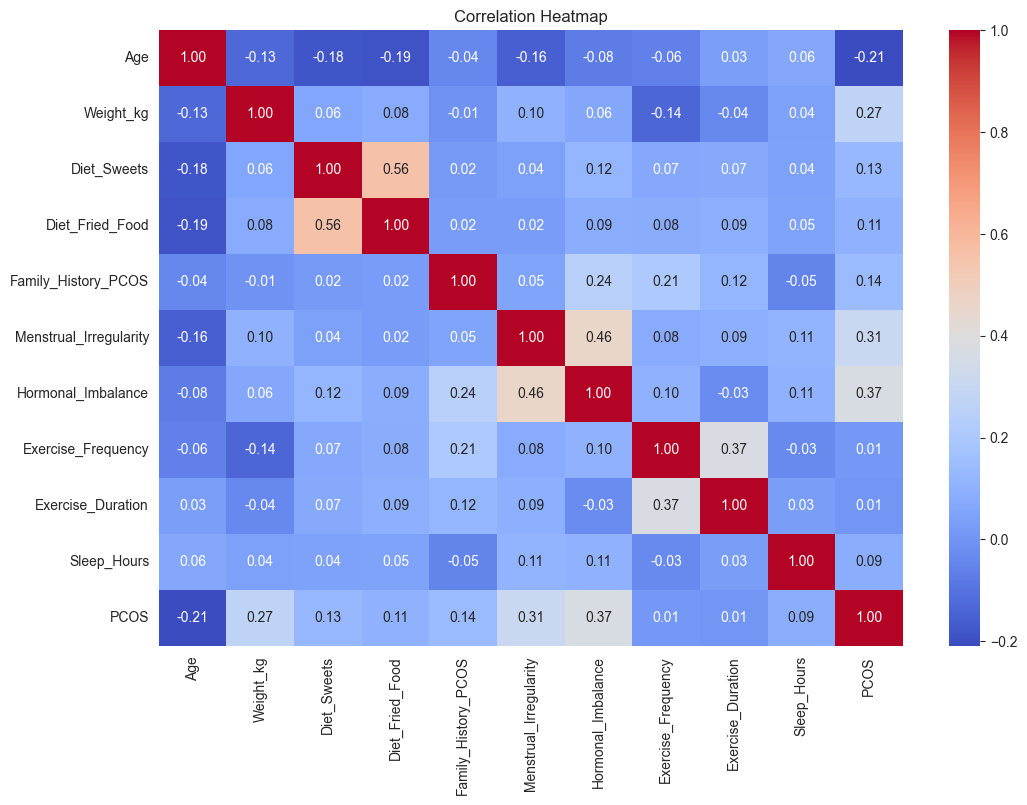

In [22]:
correlation_matrix = data_filtered[['Age','Weight_kg','Diet_Sweets', 'Diet_Fried_Food','Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance', 'Exercise_Frequency','Exercise_Duration','Sleep_Hours','PCOS']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Additional EDA plots

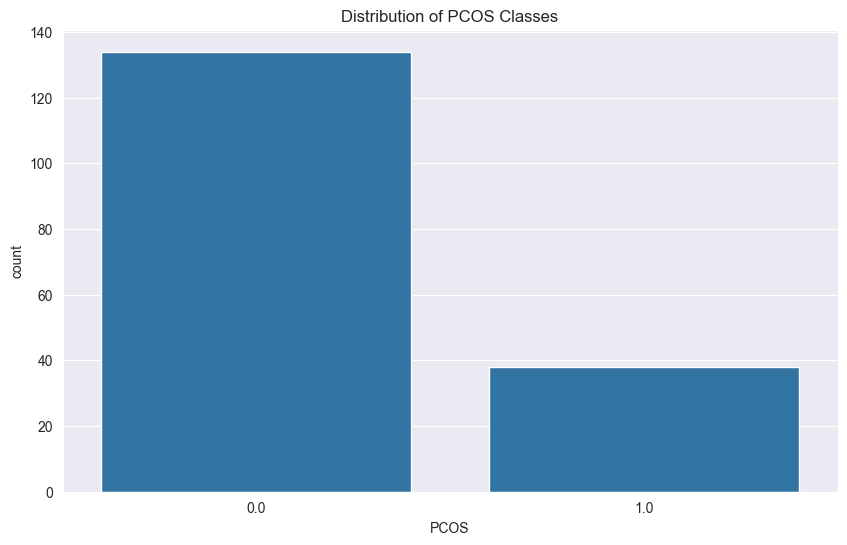

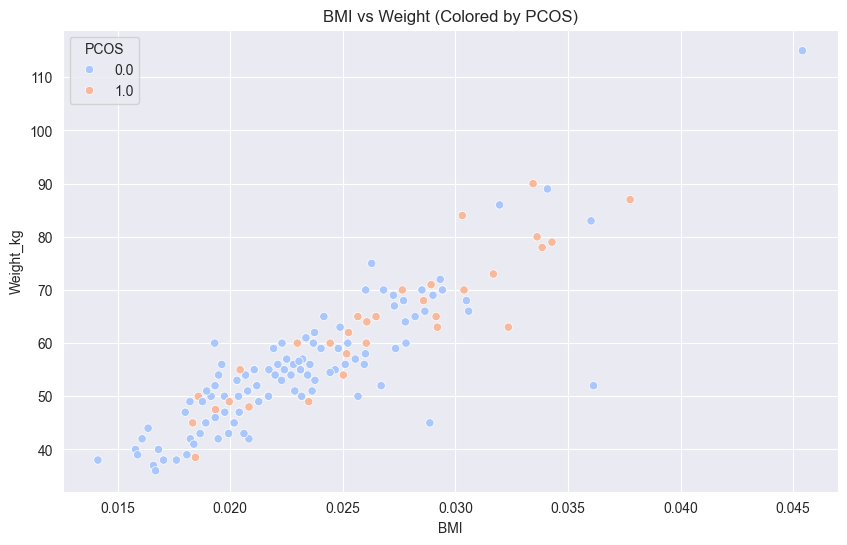

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PCOS', data=data_filtered)
plt.title('Distribution of PCOS Classes')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['BMI'], y=data_filtered['Weight_kg'], hue=data_filtered['PCOS'], palette='coolwarm')
plt.title('BMI vs Weight (Colored by PCOS)')
plt.show()

# Add Deep Learning Model (e.g., TensorFlow/Keras)

Epoch 1/50


F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2429 - loss: 0.9106 - val_accuracy: 0.6071 - val_loss: 0.6945
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5933 - loss: 0.6394 - val_accuracy: 0.6429 - val_loss: 0.6748
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8371 - loss: 0.5093 - val_accuracy: 0.6429 - val_loss: 0.6999
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8559 - loss: 0.4421 - val_accuracy: 0.6429 - val_loss: 0.7349
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8219 - loss: 0.3797 - val_accuracy: 0.6429 - val_loss: 0.7652
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8590 - loss: 0.3168 - val_accuracy: 0.6429 - val_loss: 0.7818
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8647 - loss: 0.2956 - val_accuracy: 0.6429 - val_loss: 0.7747
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8720 - loss: 0.2943 - val_accuracy: 0.6429 - val_loss: 0.7562
Epoch 9/50


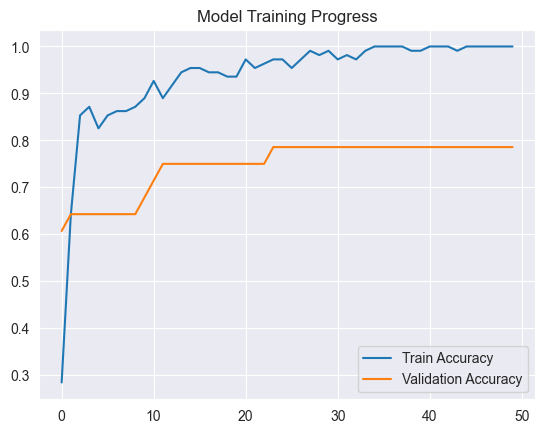

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Progress')
plt.legend()
plt.show()

# Add these analyses:

# a. Class imbalance visualization

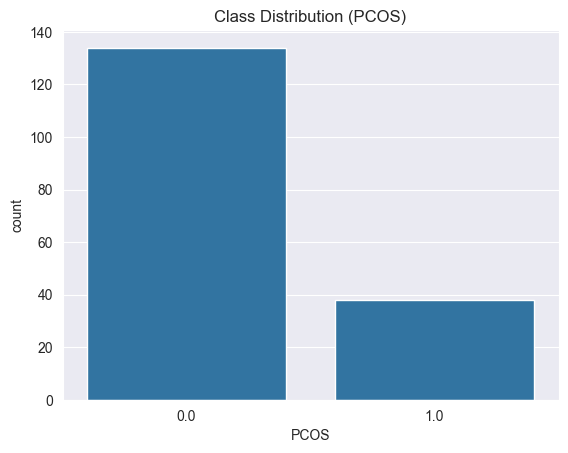

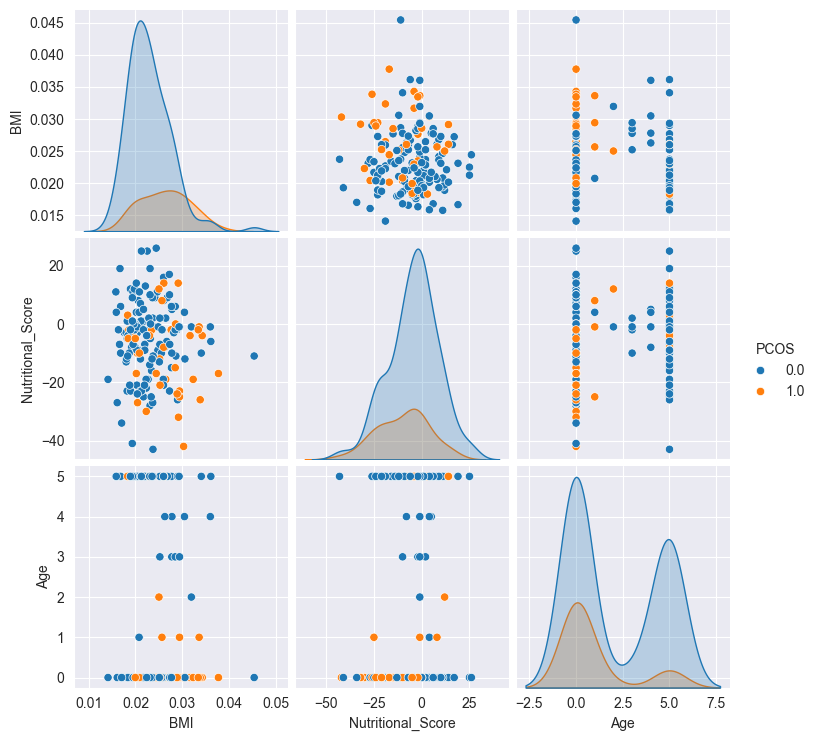

ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.2.

In [26]:
sns.countplot(x='PCOS', data=data_filtered)
plt.title('Class Distribution (PCOS)')
plt.show()

# b. Pairplot for key features
sns.pairplot(data_filtered[['BMI', 'Nutritional_Score', 'Age', 'PCOS']], hue='PCOS')
plt.show()

# c. SHAP values for model explainability
import shap
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Model Evaluation Rigor

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        27
         1.0       0.83      0.62      0.71         8

    accuracy                           0.89        35
   macro avg       0.86      0.79      0.82        35
weighted avg       0.88      0.89      0.88        35

ROC-AUC: 0.7939814814814815


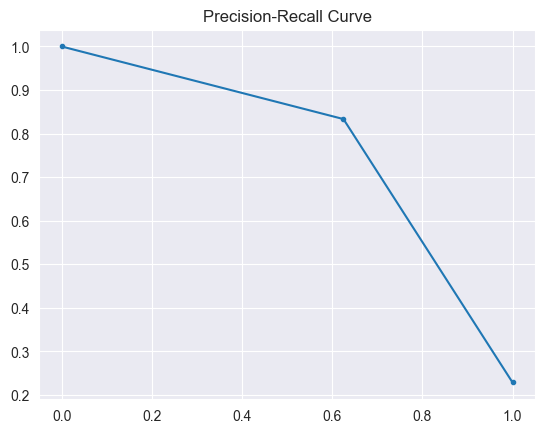

In [27]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# For all models:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.show()

In [28]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

dataset = BinaryLabelDataset(df=data_filtered, label_names=['PCOS'], 
                            protected_attribute_names=['Age', 'Marital_Status'])
metric = BinaryLabelDatasetMetric(dataset, 
                                unprivileged_groups=[{'Marital_Status': 0}], 
                                privileged_groups=[{'Marital_Status': 1}])
print("Disparate Impact Ratio:", metric.disparate_impact())

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


Disparate Impact Ratio: 1.1397058823529411


In [29]:
# Add GridSearchCV for SVM and Neural Networks
from sklearn.svm import SVC

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_search = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm_search.fit(X_train, y_train)

# For MLP:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30)],
    'alpha': [0.0001, 0.001]
}
mlp_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_mlp, cv=3)
mlp_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid={'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 30)]})

In [ ]:
import gradio as gr

def predict_pcos(Age, BMI, Exercise_Frequency):
    input_df = pd.DataFrame([[Age, BMI, Exercise_Frequency]], 
                          columns=['Age', 'BMI', 'Exercise_Frequency'])
    scaled_input = scaler.transform(input_df)
    prediction = best_rf.predict_proba(scaled_input)[0][1]
    return {"PCOS Probability": prediction}

iface = gr.Interface(fn=predict_pcos, 
                    inputs=[gr.Number(label="Age"), 
                            gr.Number(label="BMI"), 
                            gr.Number(label="Exercise Frequency")], 
                    outputs="json",
                    title="PCOS Risk Predictor")
iface.launch()